<a href="https://colab.research.google.com/github/sarakamdod10/ML-and-DL-projects/blob/main/Assignment_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import glob

In [ ]:
# Define the dimensions of checkerboard

CHECKERBOARD = (6, 8)

In [ ]:
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.

criteria = (cv2.TERM_CRITERIA_EPS +

            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
 
# Vector for 3D points

threedpoints = []
 
# Vector for 2D points

twodpoints = []

In [ ]:
#  3D points real world coordinates

objectp3d = np.zeros((1, CHECKERBOARD[0] 

                      * CHECKERBOARD[1], 

                      3), np.float32)

objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],

                               0:CHECKERBOARD[1]].T.reshape(-1, 2)

prev_img_shape = None

In [ ]:
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone

images = glob.glob('/content/WhatsApp Image 2022-07-26 at 11.58.18 PM.jpeg')
 

for filename in images:

    image = cv2.imread(filename)

    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 

    # Find the chess board corners

    # If desired number of corners are

    # found in the image then ret = true

    ret, corners = cv2.findChessboardCorners(

                    grayColor, CHECKERBOARD, 

                    cv2.CALIB_CB_ADAPTIVE_THRESH 

                    + cv2.CALIB_CB_FAST_CHECK +

                    cv2.CALIB_CB_NORMALIZE_IMAGE)
 

    # If desired number of corners can be detected then,

    # refine the pixel coordinates and display

    # them on the images of checker board

    if ret == True:

        threedpoints.append(objectp3d)
 

        # Refining pixel coordinates

        # for given 2d points.

        corners2 = cv2.cornerSubPix(

            grayColor, corners, (11, 11), (-1, -1), criteria)
 

        twodpoints.append(corners2)
 

        # Draw and display the corners

        image = cv2.drawChessboardCorners(image, 

                                          CHECKERBOARD, 

                                         corners2, ret)

In [ ]:
pip install cv2-plt-imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  64771      0 --:--:-- --:--:-- --:--:-- 64771


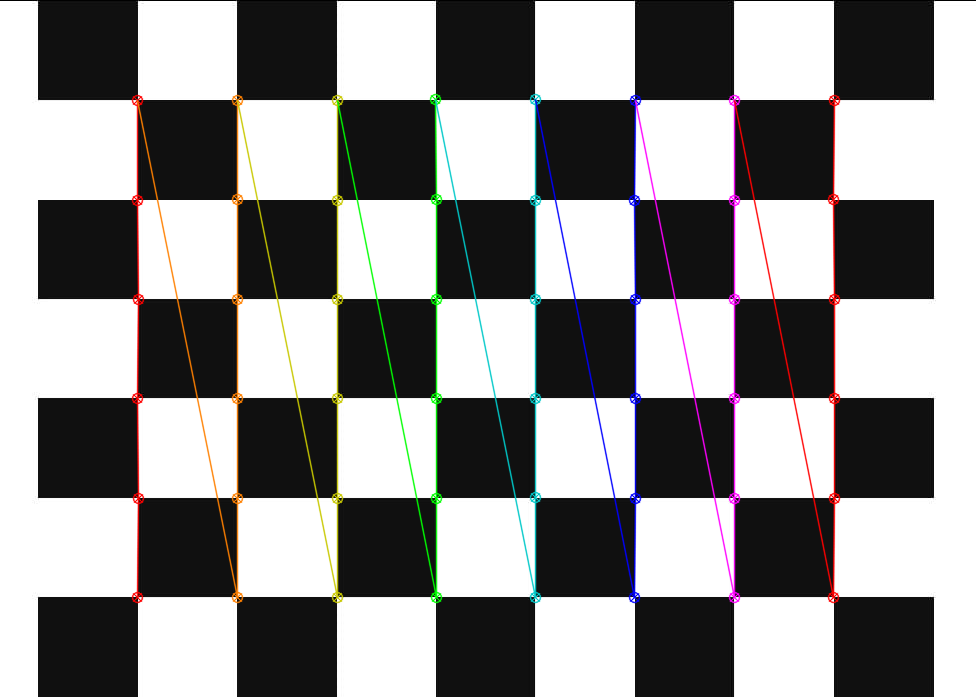

-1

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('images', cv2.IMREAD_UNCHANGED)
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
h, w = image.shape[:2]
 
 
# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)

ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(

    threedpoints, twodpoints, grayColor.shape[::-1], None, None)
 
 
# Displaying required output

print(" Camera matrix:")

print(matrix)
 

print("\n Distortion coefficient:")

print(distortion)
 

print("\n Rotation Vectors:")

print(r_vecs)
 

print("\n Translation Vectors:")

print(t_vecs)
 


 Camera matrix:
[[2.19083619e+03 0.00000000e+00 4.74566313e+02]
 [0.00000000e+00 2.19055898e+03 3.07659507e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[ 3.78578134e-01 -1.45090904e+01 -1.07532908e-03  2.64693056e-03
   1.76787832e+02]]

 Rotation Vectors:
(array([[ 0.00340244],
       [-0.00310217],
       [-1.57076892]]),)

 Translation Vectors:
(array([[-3.39376781],
       [ 2.90819002],
       [22.09236846]]),)
